In [229]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [230]:
start_date = '2019-02-01'
# CSV should have Date and Close columns

# Yearly Returns

In [231]:

def calculate_yearly_returns(file_path):
    data = pd.read_csv(file_path)
    # Convert the 'Date' column to datetime
    try:
        data['Date'] = pd.to_datetime(data['Date'],format='%d %b %Y')
    except:
        data['Date'] = pd.to_datetime(data['Date'],format='%d-%b-%y')

    data = data.sort_values('Date', ascending=True)
    data['Year'] = data['Date'].dt.year
    # Take data only from Month and year of start_date
    data = data[data['Date'] >= start_date]
    yearly_data = data.groupby('Year')['Close'].agg(['first', 'last']).reset_index()
    yearly_data['Yearly Return'] = ((yearly_data['last'] - yearly_data['first']) / yearly_data['first']) * 100
    return yearly_data[['Year', 'Yearly Return']]

In [232]:
file_paths = glob.glob('RunTemp/*.csv')
returns_data = {}

for file_path in file_paths:
    index_name = file_path.split('/')[-1].split('.')[0].split('\\')[1]  # Extract index name from file name
    yearly_returns = calculate_yearly_returns(file_path)
    returns_data[index_name] = yearly_returns.set_index('Year')['Yearly Return']
returns_df = pd.DataFrame(returns_data)

### Yearly Returns Line Chart

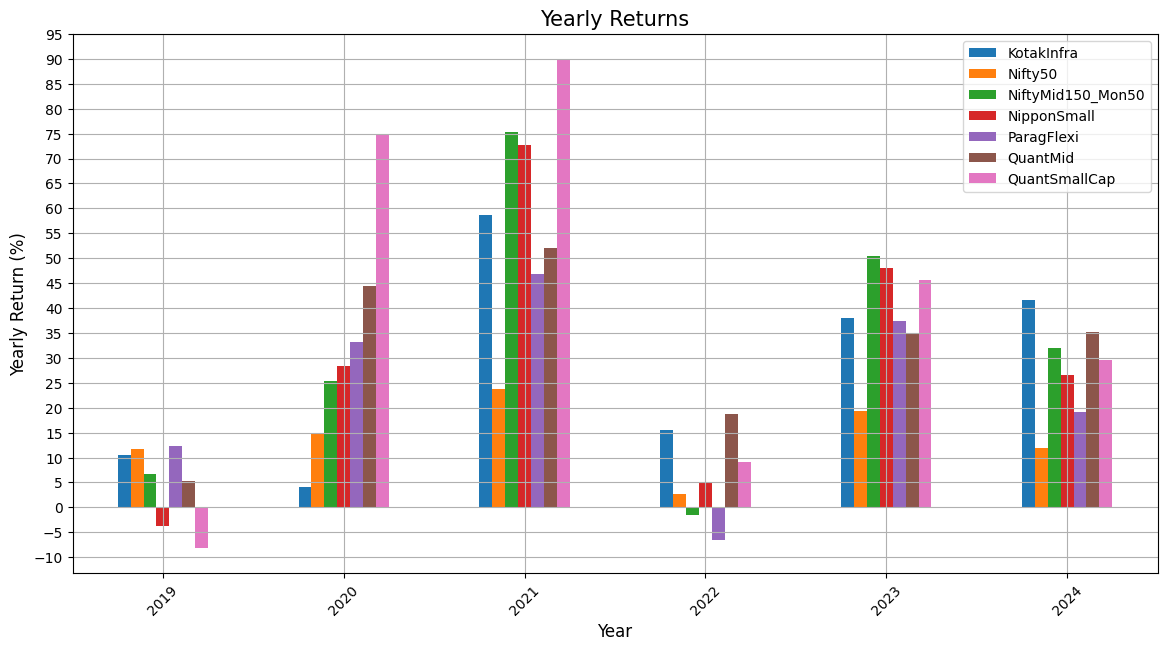

In [233]:
returns_df.plot.bar(figsize=(14, 7))
plt.xlabel('Year', fontsize=12)
plt.ylabel('Yearly Return (%)', fontsize=12)
plt.title('Yearly Returns', fontsize=15)
plt.xticks(rotation=45)
plt.yticks(range(-10, 100, 5))
plt.grid(True)
plt.show()

In [234]:
# # Plot the yearly returns for each index
# plt.figure(figsize=(14, 7))
# plt.xlabel('Year', fontsize=12)
# plt.ylabel('Yearly Return (%)', fontsize=12)
# plt.title('Yearly Returns', fontsize=15)
# plt.grid(True)
# # the x and ylabel should have year values each year not by gap of 2
# plt.xticks(returns_df.index, rotation=45)
# plt.yticks(range(-50, 100, 5))

# sns.lineplot(data=returns_df, dashes=False,)

### Average Yearly Returns

In [235]:
average_returns = returns_df.mean()

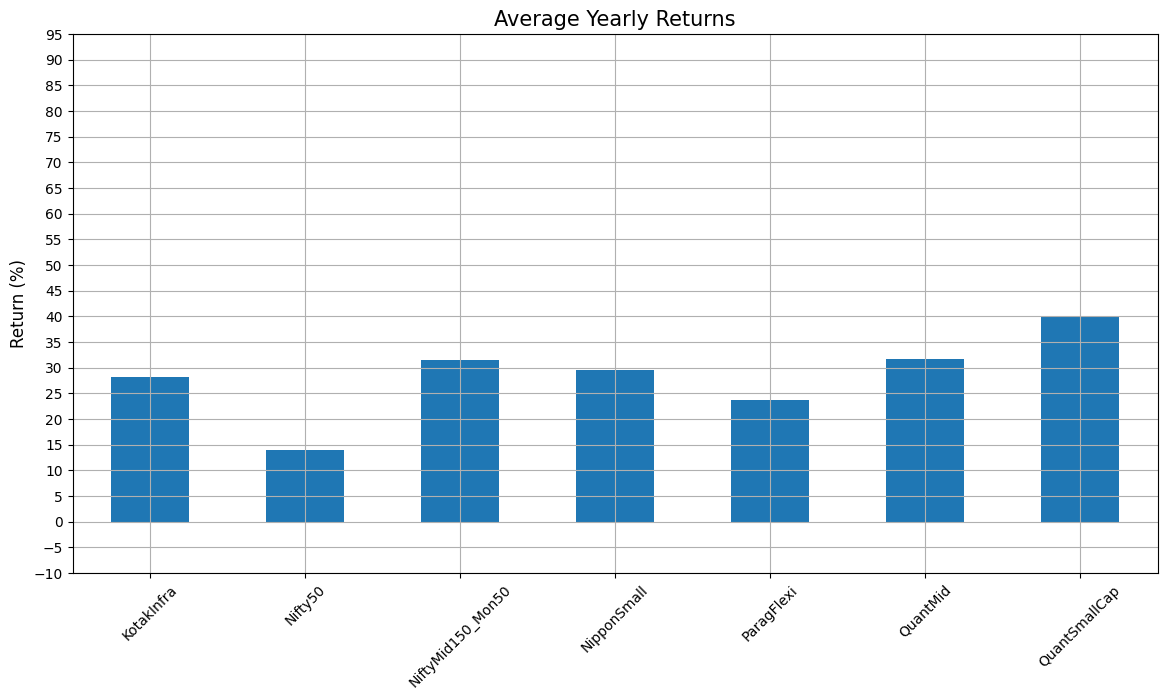

In [236]:
average_returns.plot.bar(figsize=(14, 7))
plt.ylabel('Return (%)', fontsize=12)
plt.title('Average Yearly Returns', fontsize=15)
plt.xticks(rotation=45)
plt.yticks(range(-10, 100, 5))
plt.grid(True)
plt.show()

In [237]:
# # get average yearly return for each index
# # PLOT the average yearly returns on a line plot
# plt.figure(figsize=(14, 7))
# plt.xlabel('Index', fontsize=12)
# plt.ylabel('Yearly Return (%)', fontsize=12)
# plt.title('Average Yearly Returns', fontsize=15)
# plt.grid(True)
# plt.xticks(rotation=45)
# sns.lineplot(x=average_returns.index, y=average_returns.values, marker='o')
# plt.show()

### Yearly Returns Heatmap

In [238]:
ranked_returns = returns_df.rank(axis=1, ascending=False)
ranked_returns = ranked_returns.T

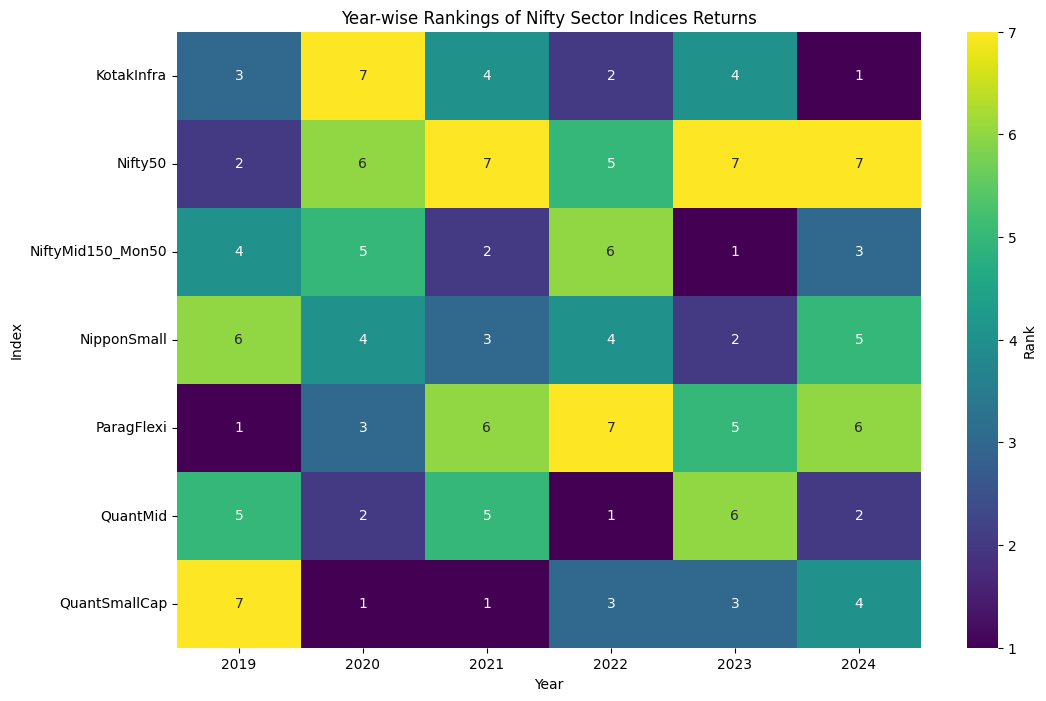

In [239]:
plt.figure(figsize=(12, 8))
sns.heatmap(ranked_returns, annot=True, cmap='viridis', cbar_kws={'label': 'Rank'})
plt.title('Year-wise Rankings of Nifty Sector Indices Returns')
plt.xlabel('Year')
plt.ylabel('Index')
plt.show()

# CAGR Returns

In [240]:
def calculate_cagr_returns(file_path):
    # Load the CSV file
    data = pd.read_csv(file_path)
    # Convert the 'Date' column to datetime
    try:
        data['Date'] = pd.to_datetime(data['Date'],format='%d %b %Y')
    except:
        data['Date'] = pd.to_datetime(data['Date'],format='%d-%b-%y')
    
    # Sort the data by date
    data = data[data['Date'] >= start_date]
    
    data = data.sort_values('Date', ascending=True)
    start_price = data['Close'].iloc[0]
    end_price = data['Close'].iloc[-1]
    years = (data['Date'].iloc[-1] - data['Date'].iloc[0]).days/365
    cagr = ((end_price/start_price)**(1/years))-1
    cagr = cagr*100
    return cagr

In [241]:
returns_data = {}
for file_path in file_paths:
    index_name = file_path.split('/')[-1].split('.')[0].split('\\')[1]
    returns_data[index_name] = calculate_cagr_returns(file_path)

cagr_df = pd.DataFrame(returns_data.items(), columns=['Index', 'CAGR'])
cagr_df = cagr_df.set_index('Index')

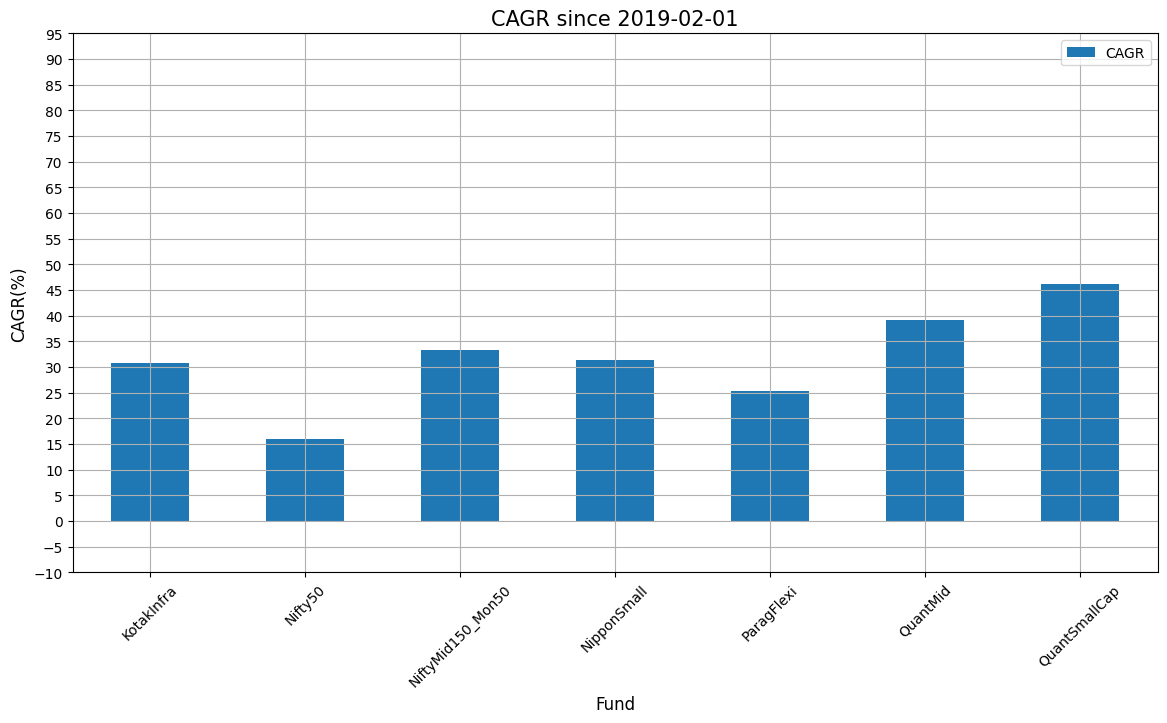

In [242]:
cagr_df.plot.bar(figsize=(14, 7))
plt.xlabel('Fund', fontsize=12)
plt.ylabel('CAGR(%)', fontsize=12)
plt.title(f'CAGR since {start_date}', fontsize=15)
plt.xticks(rotation=45)
plt.yticks(range(-10, 100, 5))
plt.grid(True)
plt.show()

In [243]:
def calculate_absolute_returns(file_path):
    # Load the CSV file
    data = pd.read_csv(file_path)
    # Convert the 'Date' column to datetime
    try:
        data['Date'] = pd.to_datetime(data['Date'],format='%d %b %Y')
    except:
        data['Date'] = pd.to_datetime(data['Date'],format='%d-%b-%y')
    
    # Sort the data by date
    data = data[data['Date'] >= start_date]
    
    data = data.sort_values('Date', ascending=True)
    start_price = data['Close'].iloc[0]
    end_price = data['Close'].iloc[-1]
    absolute_returns = (end_price - start_price)/start_price*100
    return absolute_returns

In [244]:
returns_data = {}
for file_path in file_paths:
    index_name = file_path.split('/')[-1].split('.')[0].split('\\')[1]
    returns_data[index_name] = calculate_absolute_returns(file_path)

cagr_df = pd.DataFrame(returns_data.items(), columns=['Index', 'CAGR'])
cagr_df = cagr_df.set_index('Index')

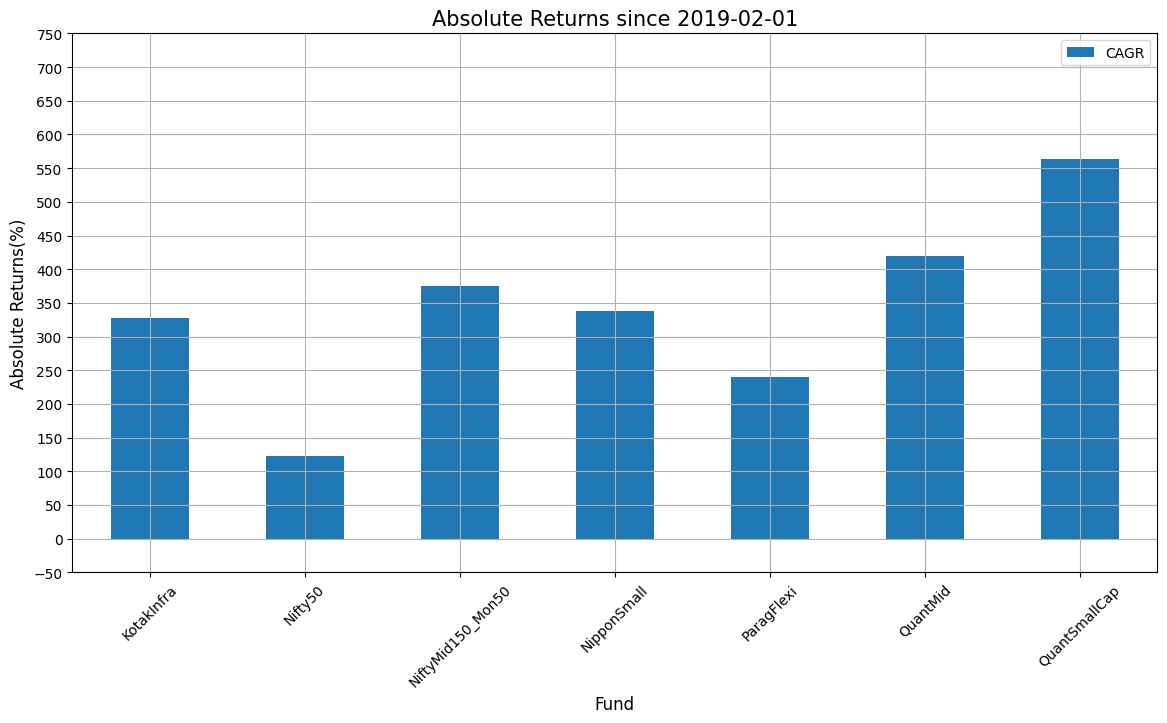

In [245]:
cagr_df.plot.bar(figsize=(14, 7))
plt.xlabel('Fund', fontsize=12)
plt.ylabel('Absolute Returns(%)', fontsize=12)
plt.title(f'Absolute Returns since {start_date}', fontsize=15)
plt.xticks(rotation=45)
plt.yticks(range(-50, 800, 50))
plt.grid(True)
plt.show()